In [1]:
import pandas as pd
import numpy as np
#트레인 스플릿
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# 사이킷런의 정확도, 정밀도, 재현율, 오차행렬을 계산하는 API 호출
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import autosklearn.regression

/home/geehwo/.local/lib/python3.6/site-packages/pkg_resources/__init__.py:119: PkgResourcesDeprecationWarning: 0.18ubuntu0.18.04.1 is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


In [2]:
#데이터셋 불러오기
train_df = pd.read_csv('data/train.csv')
train_df.drop('id', inplace = True, axis=1)
test_df = pd.read_csv('data/test.csv')
test_df.drop('id', inplace = True, axis=1)
print(train_df.head(3))
print(test_df.head(3))


  Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0      M   0.605     0.470   0.115        1.1140          0.3925   
1      I   0.430     0.315   0.095        0.3780          0.1750   
2      I   0.580     0.490   0.195        1.3165          0.5305   

   Viscra Weight  Shell Weight  Target  
0          0.291        0.3100      15  
1          0.080        0.1045       8  
2          0.254        0.4100      18  
  Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0      F   0.595     0.470   0.155         1.121          0.4515   
1      M   0.580     0.450   0.150         0.927          0.2760   
2      I   0.260     0.205   0.070         0.097          0.0415   

   Viscra Weight  Shell Weight  
0         0.1780        0.1550  
1         0.1815        0.3600  
2         0.0190        0.0305  


In [3]:
train_df.corr()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Lenght,1.000000,0.987293,0.901911,0.926321,0.896337,0.903732,0.895664,0.543789
Diameter,0.987293,1.000000,0.908348,0.927205,0.891183,0.901029,0.904546,0.567933
Height,0.901911,0.908348,1.000000,0.895409,0.837456,0.868192,0.902180,0.604654
Whole Weight,0.926321,0.927205,0.895409,1.000000,0.968007,0.966942,0.951652,0.538404
Shucked Weight,0.896337,0.891183,0.837456,0.968007,1.000000,0.932138,0.870453,0.420126
Viscra Weight,0.903732,0.901029,0.868192,0.966942,0.932138,1.000000,0.905061,0.497283
Shell Weight,0.895664,0.904546,0.902180,0.951652,0.870453,0.905061,1.000000,0.625819
Target,0.543789,0.567933,0.604654,0.538404,0.420126,0.497283,0.625819,1.000000


In [4]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1253 non-null   object 
 1   Lenght          1253 non-null   float64
 2   Diameter        1253 non-null   float64
 3   Height          1253 non-null   float64
 4   Whole Weight    1253 non-null   float64
 5   Shucked Weight  1253 non-null   float64
 6   Viscra Weight   1253 non-null   float64
 7   Shell Weight    1253 non-null   float64
 8   Target          1253 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 88.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2924 non-null   object 
 1   Lenght          2924 non-null   float64
 2   Diameter        2924 non-null   float64


In [5]:
# 원핫 인코딩
le_encoding = LabelEncoder()
encoded = le_encoding.fit(train_df['Gender'])
train_df['Gender'] = encoded.transform(train_df['Gender'])

le_encoding = LabelEncoder()
encoded = le_encoding.fit(test_df['Gender'])
test_df['Gender'] = encoded.transform(test_df['Gender'])

# 데이터 분포도
data_description = train_df.describe()
data_description

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,1.071030,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.820406,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.000000,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,1.000000,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,2.000000,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,2.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [6]:
X_train = train_df.drop('Target',axis=1)
y_train = train_df.Target
X_test = test_df

In [7]:
X_test

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,0,0.595,0.470,0.155,1.1210,0.4515,0.1780,0.1550
1,2,0.580,0.450,0.150,0.9270,0.2760,0.1815,0.3600
2,1,0.260,0.205,0.070,0.0970,0.0415,0.0190,0.0305
3,2,0.590,0.460,0.130,1.1020,0.4550,0.2055,0.3300
4,0,0.595,0.465,0.140,1.1130,0.5175,0.2440,0.3050
...,...,...,...,...,...,...,...,...
2919,1,0.170,0.105,0.035,0.0340,0.0120,0.0085,0.0050
2920,1,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.1060
2921,1,0.570,0.450,0.135,0.7940,0.3815,0.1415,0.2450
2922,1,0.460,0.350,0.120,0.4885,0.1930,0.1050,0.1550


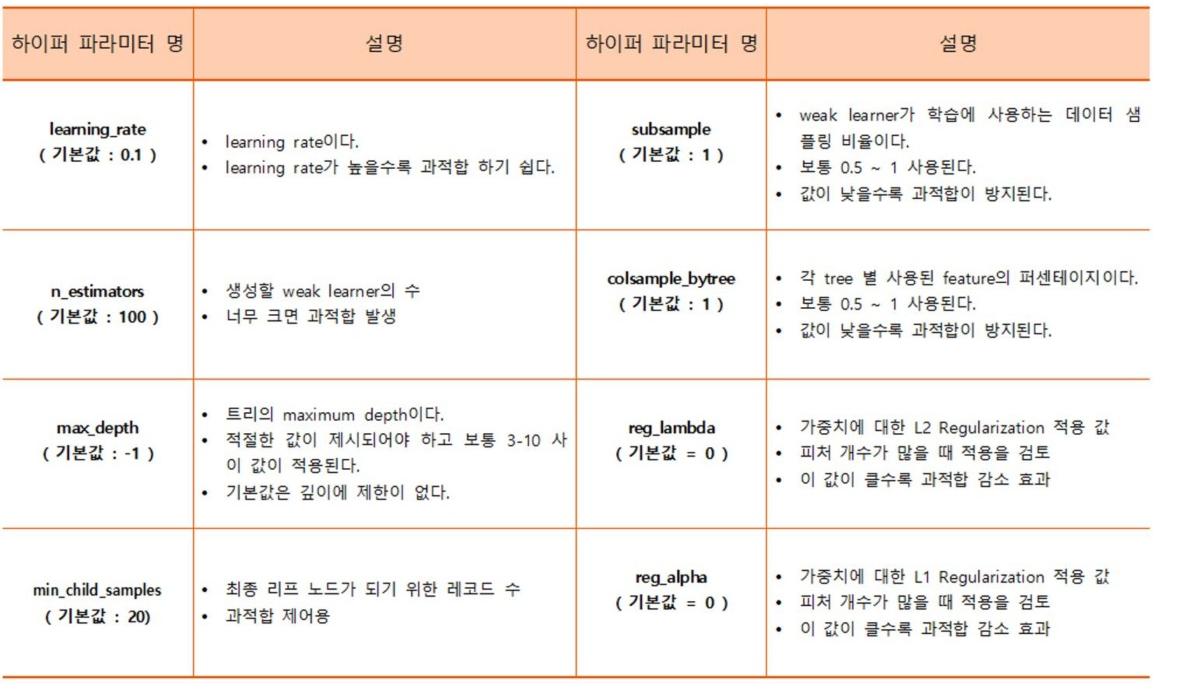


In [8]:
automl = autosklearn.regression.AutoSklearnRegressor(n_jobs=-1, resampling_strategy="cv",
                                                    resampling_strategy_arguments={"cv": 10, "folds": 10}, metric=autosklearn.metrics.mean_squared_error)
automl.fit(X_train, y_train)           

AutoSklearnRegressor(metric=mean_squared_error, n_jobs=-1,
                     per_run_time_limit=2160, resampling_strategy='cv',
                     resampling_strategy_arguments={'cv': 10, 'folds': 10})

In [9]:
y_preds = automl.predict(X_test)

In [10]:
submission = pd.read_csv('data/sample_submission.csv')

In [12]:
submission.Target = y_preds

In [13]:
submission

,id,Target
0,1,9.591153
1,2,14.076974
2,3,5.875933
3,4,11.975524
4,5,10.162886
...,...,...
2919,2920,4.677017
2920,2921,7.269199
2921,2922,9.493505
2922,2923,9.821901


In [14]:
submission.to_csv('submit.csv', index=False)